In [1]:
import os

import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem.AtomPairs import Pairs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem, Descriptors, MACCSkeys

In [2]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = (400, 400)

In [3]:
path_data = os.path.join('data', 'tox21_smiles.csv')
df_tox21 = pd.read_csv(path_data)

In [11]:
sample1 = df_tox21['smiles'].iloc[10]
print(sample1)

C[N+]1=CC2=C(C=CC3=C2OCO3)C4=C1C5=C(C=C4)C=C6OCOC6=C5


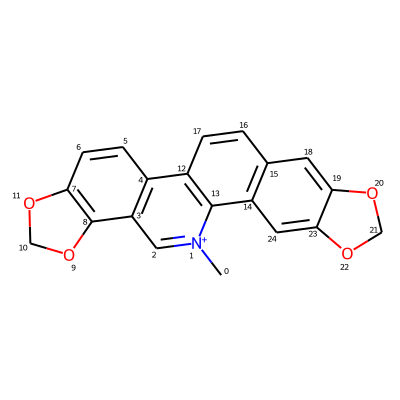

In [12]:
mol = Chem.MolFromSmiles(sample1)
mol 

In [13]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

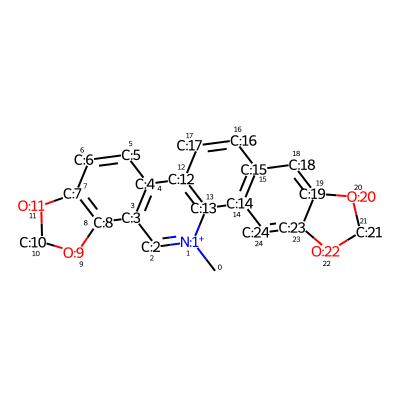

In [14]:
# With atom index
mol_with_atom_index(mol)

In [20]:
def rdkit_numpy_convert(fp, dtype=np.int8):
    '''Convert cDataStruct to Numpy array.'''
    output = []
    for f in fp:
        arr = np.zeros((1,), dtype=dtype)
        DataStructs.ConvertToNumpyArray(f, arr)
        output.append(arr)
    return np.asarray(output)

In [21]:
# Default option:
# A SMARTS-based implementation of the 166 public MACCS keys
fingerprint = MACCSkeys.GenMACCSKeys(mol)
print(fingerprint)
X = rdkit_numpy_convert([fingerprint])
print(X.shape)
print(np.sum(X))
print(X.max())

(1, 167)
40
1


In [22]:
# Morgan Fingerprints
# fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
print(fingerprint)
X = rdkit_numpy_convert([fingerprint])
print(X.shape)
print(np.sum(X))

(1, 1024)
37


In [23]:
# Standard form of Atom-pair descriptor
fingerprint = Pairs.GetAtomPairFingerprint(mol)
print(fingerprint)
X = rdkit_numpy_convert([fingerprint])
print(X.shape)
print(np.sum(X))

(1, 8388608)
300


In [24]:
# Atom-pair descriptors encoded as a standard bit vector fingerprint
fingerprint = Pairs.GetAtomPairFingerprintAsBitVect(mol)
print(fingerprint)
fingerprint = DataStructs.cDataStructs.ConvertToExplicit(fingerprint)
X = rdkit_numpy_convert([fingerprint])
print(X.shape)
print(np.sum(X))

(1, 8388608)
95


In [25]:
# RDKit fingerprint 
fingerprint = Chem.RDKFingerprint(mol)
print(fingerprint)
X = rdkit_numpy_convert([fingerprint])
print(X.shape)
print(np.sum(X))

(1, 2048)
581


## Testing Jaccard Score / Tanimoto Coefficient

In [42]:
from sklearn.metrics import jaccard_score

A = np.tile([1, 1, 0], 4).reshape(4, -1)
B = np.array([[1, 1, 0], [1, 0, 1], [0, 0, 1], [1, 0, 0]])
print('A:\n', A)
print('\nB:\n', B)

A:
 [[1 1 0]
 [1 1 0]
 [1 1 0]
 [1 1 0]]

B:
 [[1 1 0]
 [1 0 1]
 [0 0 1]
 [1 0 0]]


In [44]:
for i in range(A.shape[0]):
    print(jaccard_score(A[i], B[i]))

1.0
0.3333333333333333
0.0
0.5


In [48]:
print(jaccard_score(A.T, B.T, average=None))

[1.         0.33333333 0.         0.5       ]
